Oddelek za gospodarske dejavnosti in (motoriziran) promet Mestne občine Ljubljana slovi srce parajoči skrbi za varnost kolesarjev. V imenu te skrbi jim povsod, kjer je to v interesu kolesarjev, odvzame prednost, postavlja različne ovire in ukinja kolesarske steze. Vašemu profesorju se vedno orosi oko od ganjenosti, ko pride do mesta na Večni poti, kjer so kolesarjem odvzeli prednost, da jih ne bi povozil avto ali kombi, ki ne bi vedel, da tu nima prednosti. ([Več o tem](https://runda.si/article/sikaniranje-dobesedno-).)

## Ogrevalni del

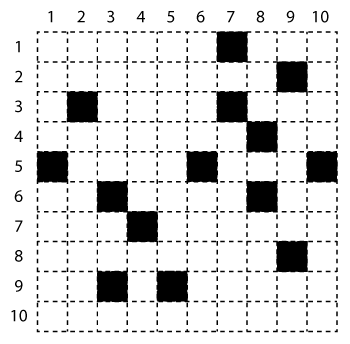

(Tega dela naloge ne oddajaj. To je samo za ogrevanje.)

Nov pristop MOL k zagotavljanju varnosti kolesarjev bi lahko bilo postavljanje kock, kot ga kaže slika.


Napiši program, ki se začne s seznamom `ovire`, ki predstavlja razpored kock v obliki parov koordinat (x, y). Sledi naj spremenljivka `x`, ki vsebuje koordinato (stolpec) po katerem se bo peljal kolesar. Program naj izpiše koordinato `y` (vrstico) prve ovire, na katero bo naletel.

Program se torej lahko začne z

```python
ovire = [(3, 9), (7, 1), (5, 9), (9, 2), (7, 3),
         (10, 5), (4, 7), (9, 8), (6, 5), (8, 6),
         (1, 5), (8, 4), (2, 3), (3, 6)]
x = 3
```

vendar naj deluje tudi za poljuben drugačen razpored ovir in koordinato `x`. Da preveriš, ali res deluje, poskušaj, recimo, različne `x`.

### Rešitev

Najprej pripravimo seznam kock in koordinato `x` - tokrat brez `input`, da ne bo potrebno ob vsakem poganjanju tipkati. `int(input(...))` menda že znamo napisati in ni treba utrjevati. :)

In [1]:
ovire = [(3, 9), (7, 1), (5, 9), (9, 2), (7, 3),
         (10, 5), (4, 7), (9, 8), (6, 5), (8, 6),
         (1, 5), (8, 4), (2, 3), (3, 6)]
x = 3

Program pa je le iskanje minimuma nekega seznama (kar smo že velikokrat počeli), a z dodatno omejitvijo - iščemo minimum drugega elementa terke, pri čemer mora imeti prvi neko določeno vrednost.

In [2]:
ymin = None
for xn, yn in ovire:
    if xn == x and (ymin == None or yn < ymin):
        ymin = yn
print(ymin)

6


Začetno vrednost `ymin` smo postavili na `None`. To bo pomenilo, da nismo srečali še nobene ovire. Pogoj v zanki pravi, da se bomo ukvarjali le s kockami, ki imajo pravo koordinato `x` (`xn == x`), pri čemer si bomo zapomnili njen `y`, če doslej še nismo videli nobene kocke v tem stolpcu (`ymin == None`) ali pa je ta `y` manjši od najmanjšega doslej `(yn < ymin)`.

Čeprav je program kratek, omogoča tistim, ki programirajo prvič v življenju, kar nekaj napak.

Če zanko napišemo kot `for x, y in ovire`, to ne bo dobro, ker smo s tem izgubili vrednost `x`, ki smo jo definirali zgoraj. `x` je v tem programu številka stolpca, s katerim se ukvarjamo. Če kasneje pišemo `for x, y ...`, bo zanka `for` spremenljivki `x` prirejala različne druge vrednosti.

Pogoje ne sme biti `if xn == x and ymin == None or yn < ymin`: to ne bi delovalo, ker ima `and` prednost pred `or`. Pogoj brez oklepajev je zato enak, kot če bi pisali `if (xn == x and ymin == None) or yn < ymin` in to očitno ni to, kar hočemo.

Pomemben je tudi vrstni red pogojev: `ymin == None or yn < ymin` in ne `yn < ymin or ymin == None`. Zaradi kratkostičnega vedenja Python v `or` ne bo preverjal drugega pogoja, kadar je resničen že prvi. In to je pomembno: če poskušamo preverjati `yn < ymin`, ko je `ymin` še enak `None` bo Python sporočil napako.

Včasih videvam tudi tole: študent namesto `ymin = yn` napiše `yn = ymin`. To je posledica tega, da si v slovenščini rečemo "*potem je ta element najmanjši*". Seveda prirejanje v Pythonu ne deluje v to smer.

<h2 style="clear: both">Obvezna naloga</h2>


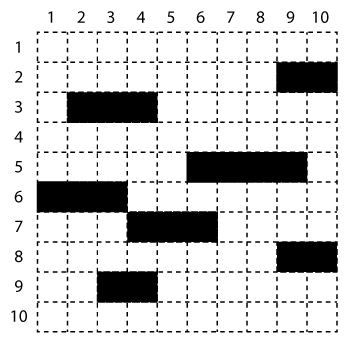


To nalogo oddaj.

Ovire v resnici niso kocke, temveč šikane, kot jih vidite pred FRI in v [gornjem blogu](https://runda.si/article/sikaniranje-dobesedno-). Njihove pozicije zato niso opisane s seznamom parov, temveč seznamov trojk `(x1, x2, y)`, kjer sta `x1` in `x2` (`x1` <= `x2`) številki stolpca, kjer se ovira začne in konča (ovira pokriva tudi `x2`).


Napiši program, ki se začne s seznamom ovir in številko stolpca, na primer

```python
ovire = ...
x = ...
```

in izpiše številko vrstice s prvo oviro.

Predpostaviti smeš, da bo kolesar vedno naletel na oviro.

### Rešitev

Rešitev je precej podobna rešitvi ogrevalne naloge. Razlika je le v tem, da imamo seznam trojk, zato namesto `xn, yn` gremo prek `x0, x1, yn`, in da ne zahtevamo, da je `x` enak `xn`, temveč da je med `x0` in `x1`.

In [3]:
ovire = [(1, 3, 6), (2, 4, 3),
         (3, 4, 9), (6, 9, 5), (9, 10, 2), (9, 10, 8),
         (4, 6, 7),
         ]
x = 6
ymin = None
for x0, x1, yn in ovire:
    if x0 <= x <= x1 and (ymin == None or yn < ymin):
        ymin = yn
print(ymin)

5


<h2 style="clear: both">Dodatna naloga</h2>

K programu dodaj še tole: program naj najprej ugotovi širino kolesarske steze - ta je enaka največji (desni) koordinati x. Nato izpiše številko stolpca, po katerem se bo kolesar pripeljal najdlje in številko vrstice s prvo oviro, na katero bo naletel.

Če je MOL kaj spregledal in lahko kolesar nevarno prevozi kak stolpec, ne da bi naletel na oviro, pa naj program izpiše koordinato stolpca, namesto vrstice z oviro pa napiše "Zmaga!".

### Rešitev

Najprej ugotovimo širino.

In [4]:
sirina = None
for _, x1, _ in ovire:
    if sirina == None or x1 > sirina:
        sirina = x1

Tu je zanimivo poimenovanje spremenljivk: iz trojke potrebujemo le srednjo spremenljivko. Lahko bi obdržali `x0, x1, yn`, vendar `x0` in `xn` ne potrebujemo, zato ju preimenujemo v `_` - kar je običajno ime za spremenljivko, ki je ne potrebujemo in je tam le zato, ker pač mora biti.

Nadaljevanje rešitve pa je takšno: obvezna naloga išče globino za določen `x`. Tu pa moramo toisto reč ponoviti za vse `x` od `1` do `sirina`.

To lahko naredimo tako, da ves prejšnji program skopiramo znotraj zanke `while`, v kateri povečujemo `x`

```python
x = 1
while x <= sirina:
    ... prejšnji program ...
    x += 1
```

ali pa, če že znamo, uporabimo zanko `for` in `range`

```python
for x in range(1, sirina + 1):
    ... prejšnji program ...
```

A to ni vse: ni dovolj le ponavljati prejšnjega programa za vsak `x`, temveč si moramo zapomniti, kakšen je bil največji dobljeni `ymin` in kakšen je bil pripadajoči `x`. Se pravi

```python
naj_y = naj_x = 0
for x in range(1, sirina + 1):
    ... prejšnji program ...
    if ymin > naj_y:
        naj_y = ymin
        naj_x = x
        
print(naj_x, naj_y)
```

V začetku smo, zvito, nastavili `naj_y` na `0`, da nam ni potrebno zapletati z `None`. Upamo, da bomo vsaj enkrat nekam prišli.

Manjka pa še nekaj: kaj če pridemo v katerem od stolpcev do konca? V tem primeru moramo izpisati, da smo zmagali.

Kako bomo vedeli, da smo v "prejšnjem programu" prišli do konca? `ymin` bo v tem primeru ostal `None`. Torej potrebujemo tole:

```python
naj_y = naj_x = 0
for x in range(1, sirina + 1):
    ... prejšnji program ...
    if ymin == None or ymin > naj_y:
        naj_y = ymin
        naj_x = x
        if ymin == None:
            break
        
if ymin == None:
    print(naj_x, "Zmaga!")
else:
    print(naj_x, naj_y)
```

Najboljši y in x si zapomnimo, kadar je boljši od najboljšega doslej (`ymin > naj_y`) ali pa kadar nas pripelje do konca (`ymin == None`). V drugem primeru po tem, ko priredimo vrednosti `naj_y` in `naj_x` še prekinemo zanko. Po zanki preverimo, ali je potrebno izpisati številke ali deklarirati zmago.

Obstaja seveda še kup drugih načinov, na primer:

```python
naj_y = naj_x = 0
for x in range(1, sirina + 1):
    ... prejšnji program ...
    if ymin == None:
        naj_y = "Zmaga!"
        naj_x = x
        break
    if ymin > naj_y:
        naj_y = ymin
        naj_x = x

print(naj_x, naj_y)
```

Zdaj ne potrebujemo `if` po zanki, saj preprosto priredimo `naj_y` niz `"Zmaga!"`, in ta se izpiše namesto številke. Ta rešitev mi sicer ni najbolj všeč; čeprav Python to dopušča, je vendarle lepo, da je `naj_y` po koncu programa bodisi vedno številka bodisi vedno niz, ne pa, da je to odvisno od izida.

Druga različica je 


```python
naj_y = naj_x = 0
for x in range(1, sirina + 1):
    ... prejšnji program ...
    if ymin == None:
        print(x, "Zmaga!")
        break
    if ymin > naj_y:
        naj_y = ymin
        naj_x = x
else:
    print(naj_x, naj_y)
```

`else` po zanki se, vemo, izvede, če se zanka ni končala z `break`. Če zmagamo, deklariramo zmago in `break`, sicer, če se to ne zgodi v nobeni iteraciji zanke, pa izpišemo najboljše, kar smo našli.